### Exploration of North Dakota's Wheat culture on a State Level


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/ND_State.csv')

In [ ]:
df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [ ]:
df = df.drop(['Program','State ANSI','Ag District', 'Ag District Code', 'County','CV (%)','Region',
       'County ANSI', 'Zip Code','Domain','Domain Category','Watershed','watershed_code','Commodity'], axis=1)
df.head(2)

,Year,Period,Week Ending,Geo Level,State,Data Item,Value
0,2024,WEEK #35,2023-09-03,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED",0
1,2024,WEEK #36,2023-09-10,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED",12


In [ ]:
df['Value'] = df['Value'].str.replace(',','').astype(float)

In [ ]:
df.head()

,Year,Period,Week Ending,Geo Level,State,Data Item,Value
0,2024,WEEK #35,2023-09-03,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED",0.0
1,2024,WEEK #36,2023-09-10,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED",12.0
2,2024,WEEK #37,2023-09-17,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED",23.0
3,2024,WEEK #38,2023-09-24,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT EMERGED",12.0
4,2024,WEEK #38,2023-09-24,STATE,NORTH DAKOTA,"WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED",36.0


### Granularité à l'échelle des semaines:

In [ ]:
df[df['Week Ending'].isna()]['Period'].value_counts()

Period
YEAR                   5571
YEAR - AUG FORECAST     226
YEAR - JUL FORECAST     214
YEAR - SEP FORECAST      91
YEAR - JUN ACREAGE       68
YEAR - MAY FORECAST      49
YEAR - MAR ACREAGE       46
YEAR - JUN FORECAST      34
YEAR - DEC ACREAGE        9
Name: count, dtype: int64

In [ ]:
df_period = df[~df['Week Ending'].isna()]
df_period['Data Item'].unique()

array(['WHEAT, WINTER - PROGRESS, MEASURED IN PCT PLANTED',
       'WHEAT, WINTER - PROGRESS, MEASURED IN PCT EMERGED',
       'WHEAT, WINTER - CONDITION, MEASURED IN PCT EXCELLENT',
       'WHEAT, WINTER - CONDITION, MEASURED IN PCT FAIR',
       'WHEAT, WINTER - CONDITION, MEASURED IN PCT GOOD',
       'WHEAT, WINTER - CONDITION, MEASURED IN PCT POOR',
       'WHEAT, WINTER - CONDITION, MEASURED IN PCT VERY POOR',
       'WHEAT, SPRING, (EXCL DURUM) - PROGRESS, MEASURED IN PCT PLANTED',
       'WHEAT, WINTER - PROGRESS, MEASURED IN PCT HEADED',
       'WHEAT, WINTER - PROGRESS, MEASURED IN PCT JOINTING',
       'WHEAT, SPRING, DURUM - PROGRESS, MEASURED IN PCT PLANTED',
       'WHEAT, SPRING, (EXCL DURUM) - PROGRESS, MEASURED IN PCT EMERGED',
       'WHEAT, SPRING, DURUM - PROGRESS, MEASURED IN PCT EMERGED',
       'WHEAT, SPRING, (EXCL DURUM) - CONDITION, MEASURED IN PCT EXCELLENT',
       'WHEAT, SPRING, (EXCL DURUM) - CONDITION, MEASURED IN PCT FAIR',
       'WHEAT, SPRING, (EXCL 

In [ ]:
# Function to extract the season including 'EXCL DURUM' and 'DURUM' and update the Data Item
def extract_full_season(data_item):
    if 'WHEAT, WINTER' in data_item:
        return 'WHEAT, WINTER', data_item.replace('WHEAT, WINTER - ', '')
    elif 'WHEAT, SPRING, (EXCL DURUM)' in data_item:
        return 'WHEAT, SPRING, (EXCL DURUM)', data_item.replace('WHEAT, SPRING, (EXCL DURUM) - ', '')
    elif 'WHEAT, SPRING, DURUM' in data_item:
        return 'WHEAT, SPRING, DURUM', data_item.replace('WHEAT, SPRING, DURUM - ', '')
    else:
        return None, data_item  # In case there are data items without the season

# Applying the updated function to the DataFrame
df_period[['Season', 'Data Item']] = df_period.apply(lambda row: extract_full_season(row['Data Item']), axis=1, result_type='expand')

df_period

C:\Users\Asus\AppData\Local\Temp\ipykernel_20856\3875902505.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period[['Season', 'Data Item']] = df_period.apply(lambda row: extract_full_season(row['Data Item']), axis=1, result_type='expand')


,Year,Period,Week Ending,Geo Level,State,Data Item,Value,Season
0,2024,WEEK #35,2023-09-03,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT PLANTED",0.0,"WHEAT, WINTER"
1,2024,WEEK #36,2023-09-10,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT PLANTED",12.0,"WHEAT, WINTER"
2,2024,WEEK #37,2023-09-17,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT PLANTED",23.0,"WHEAT, WINTER"
3,2024,WEEK #38,2023-09-24,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT EMERGED",12.0,"WHEAT, WINTER"
4,2024,WEEK #38,2023-09-24,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT PLANTED",36.0,"WHEAT, WINTER"
...,...,...,...,...,...,...,...,...
10349,1981,WEEK #33,1981-08-16,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT HARVESTED",42.0,"WHEAT, SPRING, (EXCL DURUM)"
10350,1981,WEEK #34,1981-08-23,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT HARVESTED",71.0,"WHEAT, SPRING, (EXCL DURUM)"
10351,1981,WEEK #35,1981-08-30,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT HARVESTED",84.0,"WHEAT, SPRING, (EXCL DURUM)"
10352,1981,WEEK #36,1981-09-06,STATE,NORTH DAKOTA,"PROGRESS, MEASURED IN PCT HARVESTED",94.0,"WHEAT, SPRING, (EXCL DURUM)"


In [ ]:
df_period[df_period['Data Item']=='CONDITION, MEASURED IN PCT EXCELLENT']

,Year,Period,Week Ending,Geo Level,State,Data Item,Value,Season
15,2023,WEEK #04,2023-01-29,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",0.0,"WHEAT, WINTER"
20,2023,WEEK #08,2023-02-26,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",2.0,"WHEAT, WINTER"
25,2023,WEEK #12,2023-03-26,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",2.0,"WHEAT, WINTER"
31,2023,WEEK #13,2023-04-02,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",1.0,"WHEAT, WINTER"
40,2023,WEEK #14,2023-04-09,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",0.0,"WHEAT, WINTER"
...,...,...,...,...,...,...,...,...
9590,1986,WEEK #29,1986-07-20,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",2.0,"WHEAT, SPRING, (EXCL DURUM)"
9594,1986,WEEK #30,1986-07-27,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",2.0,"WHEAT, SPRING, (EXCL DURUM)"
9597,1986,WEEK #31,1986-08-03,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",3.0,"WHEAT, SPRING, (EXCL DURUM)"
9601,1986,WEEK #32,1986-08-10,STATE,NORTH DAKOTA,"CONDITION, MEASURED IN PCT EXCELLENT",2.0,"WHEAT, SPRING, (EXCL DURUM)"


In [ ]:
df_period['Data Item'].unique()

array(['PROGRESS, MEASURED IN PCT PLANTED',
       'PROGRESS, MEASURED IN PCT EMERGED',
       'CONDITION, MEASURED IN PCT EXCELLENT',
       'CONDITION, MEASURED IN PCT FAIR',
       'CONDITION, MEASURED IN PCT GOOD',
       'CONDITION, MEASURED IN PCT POOR',
       'CONDITION, MEASURED IN PCT VERY POOR',
       'PROGRESS, MEASURED IN PCT HEADED',
       'PROGRESS, MEASURED IN PCT JOINTING',
       'PROGRESS, MEASURED IN PCT HARVESTED',
       'PROGRESS, MEASURED IN PCT COLORING',
       'PROGRESS, MEASURED IN PCT MATURE'], dtype=object)

In [ ]:
df_pivot = df_period.pivot_table(
    index=['Year', 'Period', 'Week Ending', 'Geo Level', 'State', 'Season'],
    columns='Data Item',
    values='Value', ).reset_index()

In [ ]:
df_pivot.to_csv('data/ND_State_pivoted.csv',index=False)

#### Notes
The weekly evolution of the wheat started from the year 1981.

No weekly evolution for NON-irrigated.


Forecasting AUG, JUL & SEP of the YIELD (total, excl durum and durum) started in 1971.

### Granularité à l'échelle des années:

In [ ]:
df_year = df[df['Week Ending'].isna()].drop('Week Ending',axis=1)
df_year

,Year,Period,Geo Level,State,Data Item,Value
511,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,6530000.0
512,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES PLANTED,6610000.0
513,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",307845000.0
514,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",47.1
515,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",5520000.0
...,...,...,...,...,...,...
13498,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",2340000.0
13499,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",19.5
13500,1879,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,85000.0
13501,1879,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",1742000.0


In [ ]:
df_year.nunique()

Year          145
Period          9
Geo Level       1
State           1
Data Item     133
Value        3768
dtype: int64

In [ ]:
from IPython.display import HTML

value_counts_html = df_year['Data Item'].value_counts().to_frame().to_html()

scrollable_div = f"""
<div style="height: 200px; overflow-y: scroll;">
    {value_counts_html}
</div>
"""
display(HTML(scrollable_div))


,count
Data Item,
"WHEAT, SPRING, (EXCL DURUM) - YIELD, MEASURED IN BU / ACRE",235
"WHEAT, SPRING, DURUM - YIELD, MEASURED IN BU / ACRE",235
"WHEAT - YIELD, MEASURED IN BU / ACRE",227
WHEAT - ACRES HARVESTED,159
"WHEAT - PRODUCTION, MEASURED IN BU",147
"WHEAT, SPRING, DURUM - ACRES HARVESTED",140
"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",140
"WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE",140
"WHEAT, SPRING, (EXCL DURUM) - PRODUCTION, MEASURED IN BU",129


In [ ]:
df_year[['Type', 'Variable']] = df_year['Data Item'].str.split(' - ', expand=True)
df_year

,Year,Period,Geo Level,State,Data Item,Value,Type,Variable
511,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,6530000.0,WHEAT,ACRES HARVESTED
512,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES PLANTED,6610000.0,WHEAT,ACRES PLANTED
513,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",307845000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
514,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",47.1,WHEAT,"YIELD, MEASURED IN BU / ACRE"
515,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",5520000.0,"WHEAT, SPRING, (EXCL DURUM)",ACRES HARVESTED
...,...,...,...,...,...,...,...,...
13498,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",2340000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
13499,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",19.5,WHEAT,"YIELD, MEASURED IN BU / ACRE"
13500,1879,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,85000.0,WHEAT,ACRES HARVESTED
13501,1879,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",1742000.0,WHEAT,"PRODUCTION, MEASURED IN BU"


In [ ]:
df_year = df_year[df_year['Period']=='YEAR'] #Remove the forecasts

In [ ]:
df_year['Variable'].isna().sum(),df_year['Variable'].value_counts()

(0,
 Variable
 ACRES HARVESTED                             1072
 PRODUCTION, MEASURED IN BU                  1072
 YIELD, MEASURED IN BU / ACRE                1072
 ACRES PLANTED                               1021
 YIELD, MEASURED IN BU / NET PLANTED ACRE     452
 ACRES PLANTED, NET                           437
 PRODUCTION, MEASURED IN $                    361
 PRODUCTION, MEASURED IN PCT BY TYPE           79
 YIELD, MEASURED IN BU / PLANTED ACRE           5
 Name: count, dtype: int64)

In [ ]:
df_year['Type'].isna().sum(),df_year['Type'].value_counts()

(0,
 Type
 WHEAT                                                                  722
 WHEAT, SPRING, DURUM                                                   544
 WHEAT, SPRING, (EXCL DURUM)                                            543
 WHEAT, WINTER                                                          364
 WHEAT, NON-IRRIGATED                                                   285
 WHEAT, SPRING, DURUM, NON-IRRIGATED                                    257
 WHEAT, SPRING, (EXCL DURUM), NON-IRRIGATED                             256
 WHEAT, NON-IRRIGATED, FOLLOWING SUMMER FALLOW                          242
 WHEAT, NON-IRRIGATED, CONTINUOUS CROP                                  242
 WHEAT, SPRING, DURUM, NON-IRRIGATED, CONTINUOUS CROP                   229
 WHEAT, SPRING, DURUM, NON-IRRIGATED, FOLLOWING SUMMER FALLOW           229
 WHEAT, SPRING, (EXCL DURUM), NON-IRRIGATED, FOLLOWING SUMMER FALLOW    228
 WHEAT, SPRING, (EXCL DURUM), NON-IRRIGATED, CONTINUOUS CROP            228
 W

In [ ]:
df_year

,Year,Period,Geo Level,State,Data Item,Value,Type,Variable
511,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,6530000.0,WHEAT,ACRES HARVESTED
512,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES PLANTED,6610000.0,WHEAT,ACRES PLANTED
513,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",307845000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
514,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",47.1,WHEAT,"YIELD, MEASURED IN BU / ACRE"
515,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",5520000.0,"WHEAT, SPRING, (EXCL DURUM)",ACRES HARVESTED
...,...,...,...,...,...,...,...,...
13498,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",2340000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
13499,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",19.5,WHEAT,"YIELD, MEASURED IN BU / ACRE"
13500,1879,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,85000.0,WHEAT,ACRES HARVESTED
13501,1879,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",1742000.0,WHEAT,"PRODUCTION, MEASURED IN BU"


In [ ]:
wheat_types = [
    'WHEAT, SPRING, DURUM',
    'WHEAT, SPRING, (EXCL DURUM)',
    'WHEAT, WINTER'
]

#wheat_types2 = ['WHEAT, IRRIGATED','WHEAT, NON-IRRIGATED'] #MOST OF THE WHEAT IS IRRIGATED but data only available to 2003
Variable = 'ACRES PLANTED'
Variable2 = 'ACRES HARVESTED'


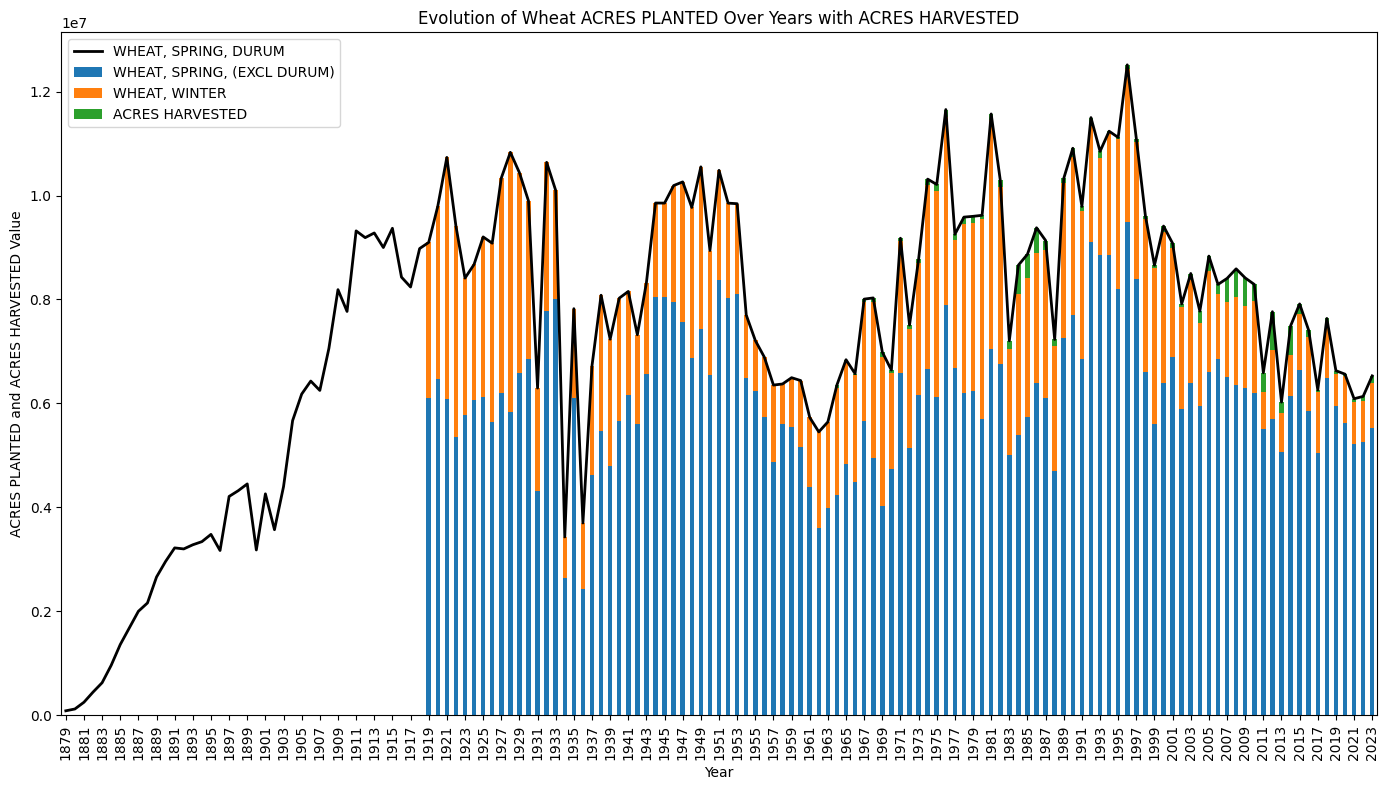

In [ ]:
# Proceed with the pivot
df_planted_pivot = df_planted.pivot_table(index='Year', columns='Type', values='Value', aggfunc='sum')
df_harvested_pivot = df_harvested.pivot_table(index='Year', values='Value', aggfunc='sum')

# Then merge the pivoted DataFrames
df_merged_pivot = pd.merge(df_planted_pivot, df_harvested_pivot, left_index=True, right_index=True, how='outer')

# When plotting, ensure that the index is treated as categorical if it's not in date format,
# which can be achieved by converting the index to string
df_merged_pivot.index = df_merged_pivot.index.map(str)

# Plot the stacked bar chart for 'ACRES PLANTED'
ax = df_merged_pivot[df_planted_pivot.columns].plot(kind='bar', stacked=True, figsize=(14, 8), label='ACRES PLANTED')

# Plot a line for 'ACRES HARVESTED' on the same axis
ax2 = df_merged_pivot[df_harvested_pivot.columns].plot(ax=ax, color='black', linewidth=2, label=Variable2)

# Set x-ticks at an interval of every 2 years
tick_labels = df_merged_pivot.index[::2]  # Take every 2nd year for the labels
tick_positions = range(0, len(df_merged_pivot.index), 2)  # Position for every 2nd year

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=90)

# Add labels and title
plt.title(f'Evolution of Wheat {Variable} Over Years with {Variable2}')
ax.set_xlabel('Year')
ax.set_ylabel(f'{Variable} and {Variable2} Value')

# Ensure the legend reflects both the bar and line plots
handles, labels = ax.get_legend_handles_labels()
# Manually define the labels for the legend to correspond to your data
labels = ['WHEAT, SPRING, DURUM', 'WHEAT, SPRING, (EXCL DURUM)', 'WHEAT, WINTER', Variable2]
ax.legend(handles, labels)

# Ensure layout is tight so labels don't get cut off
plt.tight_layout()

# Show the plot
plt.show()

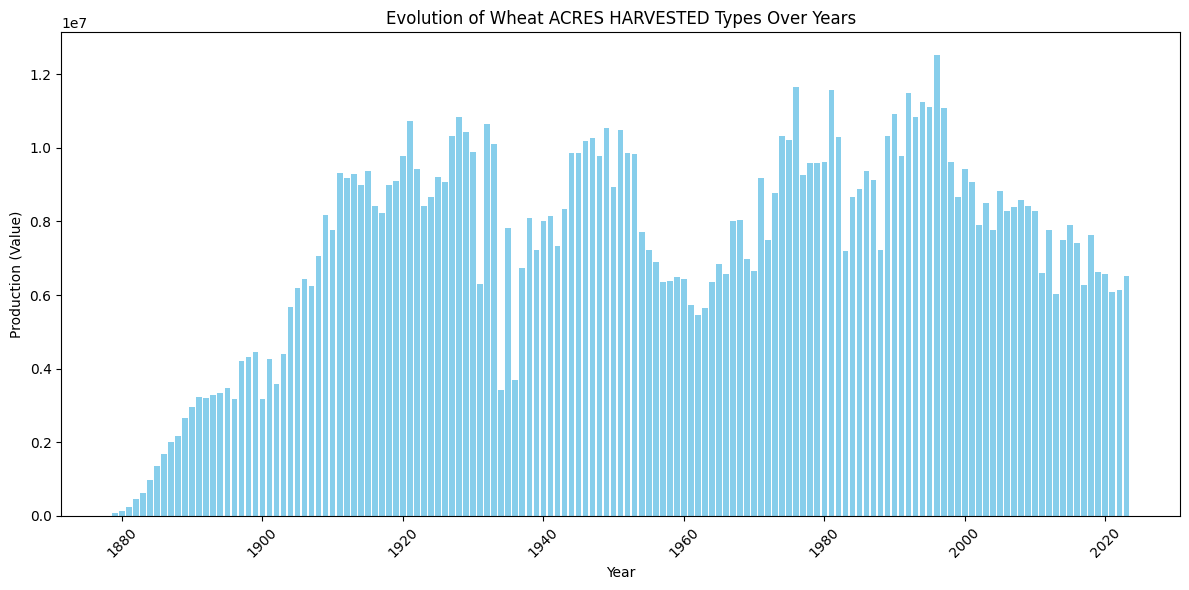

In [ ]:
Variable = 'ACRES HARVESTED'

# Filter the DataFrame for the specified wheat types
df_wheat = df_year[df_year['Type']=='WHEAT']
df_wheat = df_wheat[df_wheat['Period']=='YEAR']
df_wheat = df_wheat[df_wheat['Variable'] == Variable]
# Group by 'Year' and sum 'Value' for each year
df_wheat_production = df_wheat.groupby('Year')['Value'].sum().reset_index()

# Plot the aggregated values as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_wheat_production['Year'], df_wheat_production['Value'], color='skyblue')

# Add labels and title
plt.title(f'Evolution of Wheat {Variable} Types Over Years')
plt.xlabel('Year')
plt.ylabel('Production (Value)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the layout

# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for 'WHEAT' type and pivot it
df_wheat = df_year[df_year['Type'] == 'WHEAT']
df_wheat_pivot = df_wheat.pivot(index='Year', columns='Variable', values='Value')

# Check if 'ACRES PLANTED' is always higher than 'ACRES HARVESTED'
check = (df_wheat_pivot['ACRES PLANTED'] >= df_wheat_pivot['ACRES HARVESTED']).all()

check

,Year,Period,Geo Level,State,Data Item,Value,Type,Variable
511,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,6530000.0,WHEAT,ACRES HARVESTED
512,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES PLANTED,6610000.0,WHEAT,ACRES PLANTED
513,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",307845000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
514,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",47.1,WHEAT,"YIELD, MEASURED IN BU / ACRE"
515,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",5520000.0,"WHEAT, SPRING, (EXCL DURUM)",ACRES HARVESTED
...,...,...,...,...,...,...,...,...
13498,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",2340000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
13499,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",19.5,WHEAT,"YIELD, MEASURED IN BU / ACRE"
13500,1879,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,85000.0,WHEAT,ACRES HARVESTED
13501,1879,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",1742000.0,WHEAT,"PRODUCTION, MEASURED IN BU"


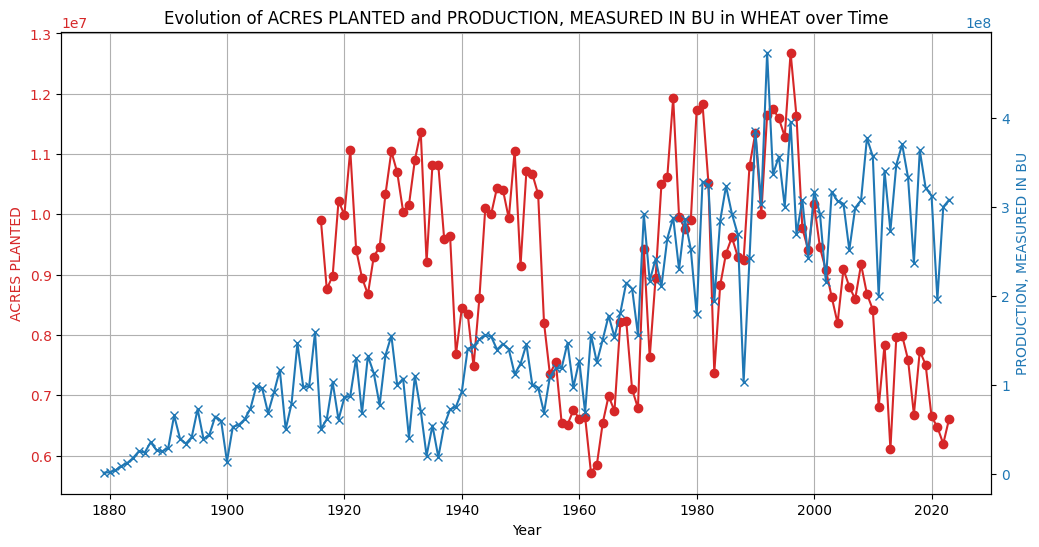

In [ ]:
# Choose the Type and Variable
chosen_type = 'WHEAT'
chosen_variable1 = 'ACRES PLANTED'
chosen_variable2 = 'PRODUCTION, MEASURED IN BU'

# Filter the DataFrame for the first Variable
filtered_df1 = df_year[(df_year['Type'] == chosen_type) & (df_year['Variable'] == chosen_variable1)]
#For period there are values like YEAR - MAR ACREAGE , YEAR - JUN ACREAGE that should be removed
filtered_df1 = filtered_df1[filtered_df1['Period']=='YEAR']
filtered_df1 = filtered_df1.sort_values('Year')

# Filter the DataFrame for the second Variable
filtered_df2 = df_year[(df_year['Type'] == chosen_type) & (df_year['Variable'] == chosen_variable2)]
#For period there are values like YEAR - MAR ACREAGE , YEAR - JUN ACREAGE that should be removed
filtered_df2 = filtered_df2[filtered_df2['Period']=='YEAR']
filtered_df2 = filtered_df2.sort_values('Year')

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first variable
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel(chosen_variable1, color=color)
ax1.plot(filtered_df1['Year'], filtered_df1['Value'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the second variable
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(chosen_variable2, color=color)
ax2.plot(filtered_df2['Year'], filtered_df2['Value'], marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title(f'Evolution of {chosen_variable1} and {chosen_variable2} in {chosen_type} over Time')
ax1.grid(True)

# Show the plot
plt.show()

Constant columns: Index(['YIELD, MEASURED IN BU / PLANTED ACRE'], dtype='object', name='Variable')
Shape of the dataset:  (145, 9)
Starting year: 1879  Ending Year: 2023


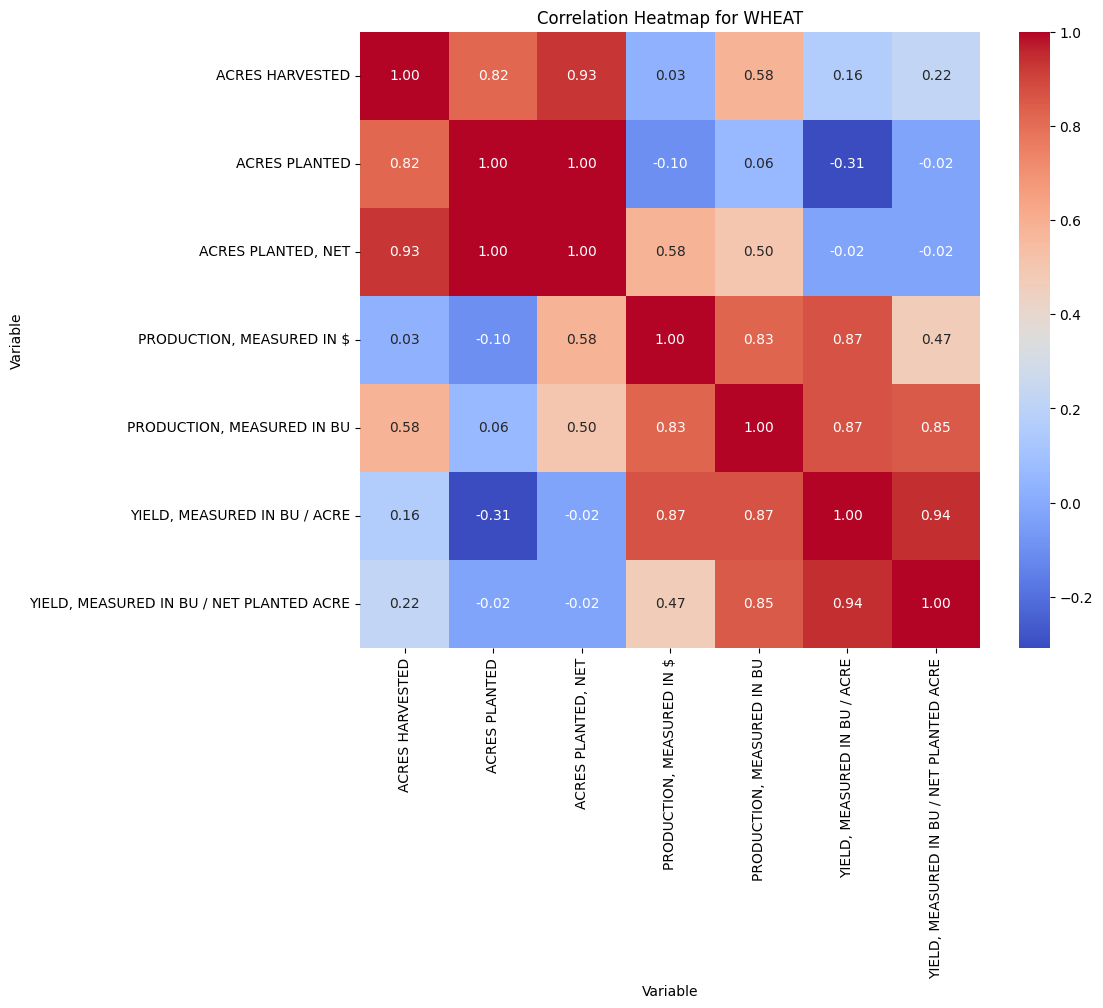

In [ ]:
# Choose the Type you're interested in
chosen_type = 'WHEAT'

# Filter the DataFrame for the chosen Type
df_filtered = df_year[df_year['Type'] == chosen_type]

# Pivot the DataFrame to get 'Year' as index and 'Variable' as columns
df_pivoted = df_filtered.pivot_table(index='Year', columns='Variable', values='Value').reset_index()

# Check for constant values
constant_columns = df_pivoted.columns[df_pivoted.nunique() <= 1]
print(f"Constant columns: {constant_columns}")
print('Shape of the dataset: ',df_pivoted.shape)
print('Starting year:', df_pivoted['Year'].min(),' Ending Year:', df_pivoted['Year'].max())

# Drop constant columns if any
df_pivoted = df_pivoted.drop(columns=constant_columns) #There is only one value for WHEAT - YIELD, MEASURED IN BU / PLANTED ACRE (0 in 2003)

df_pivoted = df_pivoted.drop('Year',axis=1)
# Compute the correlation matrix
corr_matrix = df_pivoted.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title(f'Correlation Heatmap for {chosen_type}')
plt.show()

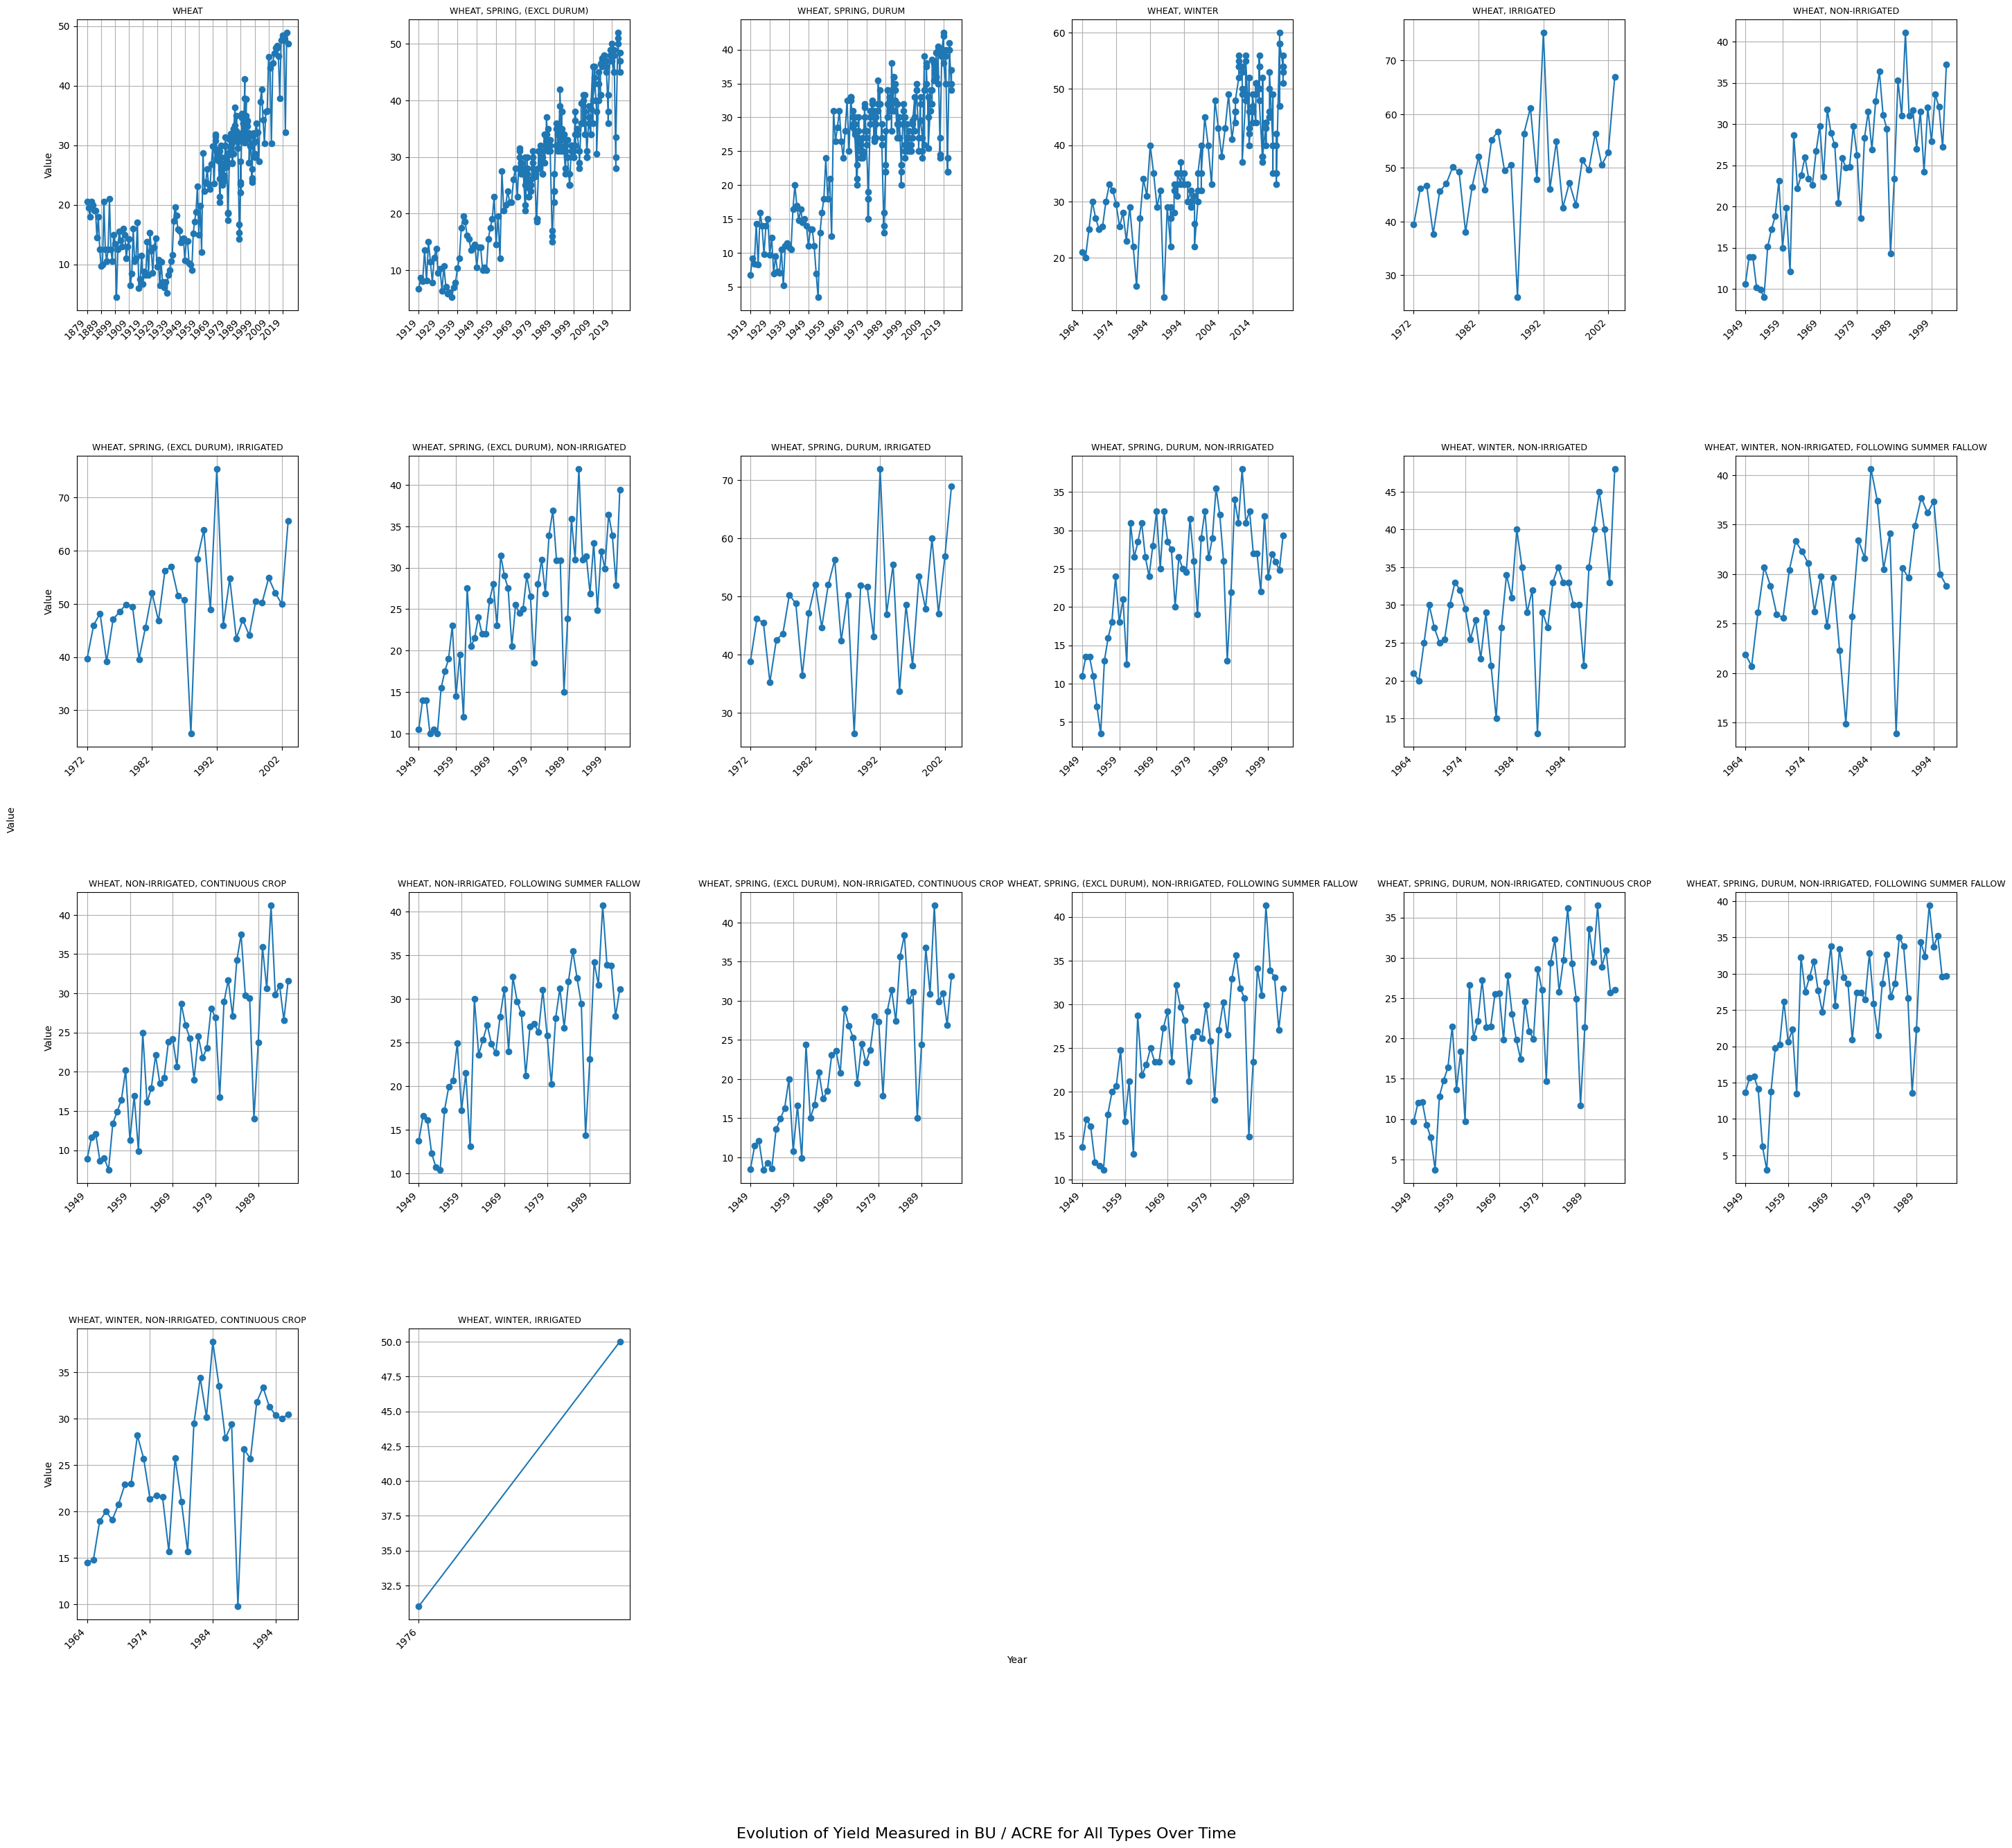

In [ ]:
df_year = df_year[~df_year['Type'].str.contains('HARD')]
unique_types = df_year['Type'].unique()

# Define the layout of the subplots
nrows = 4  # Adjust as necessary
ncols = 6  # Adjust as necessary
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35, 30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot each type in a subplot
for i, type in enumerate(unique_types):
    ax = axes[i // ncols, i % ncols]
    filtered_df = df_year[(df_year['Type'] == type) & (df_year['Variable'] == 'YIELD, MEASURED IN BU / ACRE')]
    filtered_df = filtered_df.sort_values('Year')
    ax.plot(filtered_df['Year'], filtered_df['Value'], marker='o')
    ax.set_title(f'{type}', fontsize=9)
    ax.grid(True)

    # Define xticks such that they are spaced every 10 years
    min_year, max_year = filtered_df['Year'].min(), filtered_df['Year'].max()
    xticks = range(min_year, max_year + 1, 10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=45, ha='right')

    # Set the y-axis labels to be visible for subplots in the first column
    if i % ncols == 0:
        ax.set_ylabel('Value')

# If the number of unique types is not a multiple of nrows*ncols, hide the empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flat[j])

# Add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# Hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# Set common labels
plt.xlabel("Year", labelpad=20)
plt.ylabel("Value", labelpad=40)
fig.suptitle('Evolution of Yield Measured in BU / ACRE for All Types Over Time', fontsize=16, y=0.01)
plt.savefig('yield_types.png', bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
df_year

,Year,Period,Geo Level,State,Data Item,Value,Type,Variable
511,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,6530000.0,WHEAT,ACRES HARVESTED
512,2023,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES PLANTED,6610000.0,WHEAT,ACRES PLANTED
513,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",307845000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
514,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",47.1,WHEAT,"YIELD, MEASURED IN BU / ACRE"
515,2023,YEAR,STATE,NORTH DAKOTA,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",5520000.0,"WHEAT, SPRING, (EXCL DURUM)",ACRES HARVESTED
...,...,...,...,...,...,...,...,...
13498,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",2340000.0,WHEAT,"PRODUCTION, MEASURED IN BU"
13499,1880,YEAR,STATE,NORTH DAKOTA,"WHEAT - YIELD, MEASURED IN BU / ACRE",19.5,WHEAT,"YIELD, MEASURED IN BU / ACRE"
13500,1879,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES HARVESTED,85000.0,WHEAT,ACRES HARVESTED
13501,1879,YEAR,STATE,NORTH DAKOTA,"WHEAT - PRODUCTION, MEASURED IN BU",1742000.0,WHEAT,"PRODUCTION, MEASURED IN BU"


In [ ]:
# Filter the DataFrame for the 'ACRES PLANTED, NET' and 'ACRES PLANTED' Variables
acres_planted_net = df_year[df_year['Variable'] == 'ACRES PLANTED, NET'].rename(columns={'Value': 'Acres_Planted_Net_Value'})
acres_planted = df_year[df_year['Variable'] == 'ACRES PLANTED'].rename(columns={'Value': 'Acres_Planted_Value'})

# Merge the two subsets on 'Year' and 'Type'
df_merged = pd.merge(acres_planted_net[['Year','Type','Acres_Planted_Net_Value']], acres_planted, on=['Year', 'Type'], suffixes=('_Net', '_Total'))

# Calculate the 'ACRES PLANTED RATIO'
df_merged['ACRES PLANTED RATIO'] = df_merged['Acres_Planted_Net_Value'] / df_merged['Acres_Planted_Value']
df_merged

,Year,Type,Acres_Planted_Net_Value,Period,Geo Level,State,Data Item,Acres_Planted_Value,Variable,ACRES PLANTED RATIO
0,2003,WHEAT,8630000.0,YEAR,STATE,NORTH DAKOTA,WHEAT - ACRES PLANTED,8630000.0,ACRES PLANTED,1.000000
1,2003,"WHEAT, IRRIGATED",23400.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, IRRIGATED - ACRES PLANTED",23400.0,ACRES PLANTED,1.000000
2,2003,"WHEAT, NON-IRRIGATED",8606600.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, NON-IRRIGATED - ACRES PLANTED",8606600.0,ACRES PLANTED,1.000000
3,2003,"WHEAT, WINTER",130000.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, WINTER - ACRES PLANTED",130000.0,ACRES PLANTED,1.000000
4,2003,"WHEAT, WINTER, NON-IRRIGATED",130000.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, WINTER, NON-IRRIGATED - ACRES PLANTED",130000.0,ACRES PLANTED,1.000000
...,...,...,...,...,...,...,...,...,...,...
432,1972,"WHEAT, SPRING, DURUM, NON-IRRIGATED, FOLLOWING...",1971000.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, SPRING, DURUM, NON-IRRIGATED, FOLLOWING...",1971000.0,ACRES PLANTED,1.000000
433,1972,"WHEAT, WINTER",72300.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, WINTER - ACRES PLANTED",73000.0,ACRES PLANTED,0.990411
434,1972,"WHEAT, WINTER, NON-IRRIGATED",72300.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, WINTER, NON-IRRIGATED - ACRES PLANTED",73000.0,ACRES PLANTED,0.990411
435,1972,"WHEAT, WINTER, NON-IRRIGATED, CONTINUOUS CROP",3600.0,YEAR,STATE,NORTH DAKOTA,"WHEAT, WINTER, NON-IRRIGATED, CONTINUOUS CROP ...",3600.0,ACRES PLANTED,1.000000


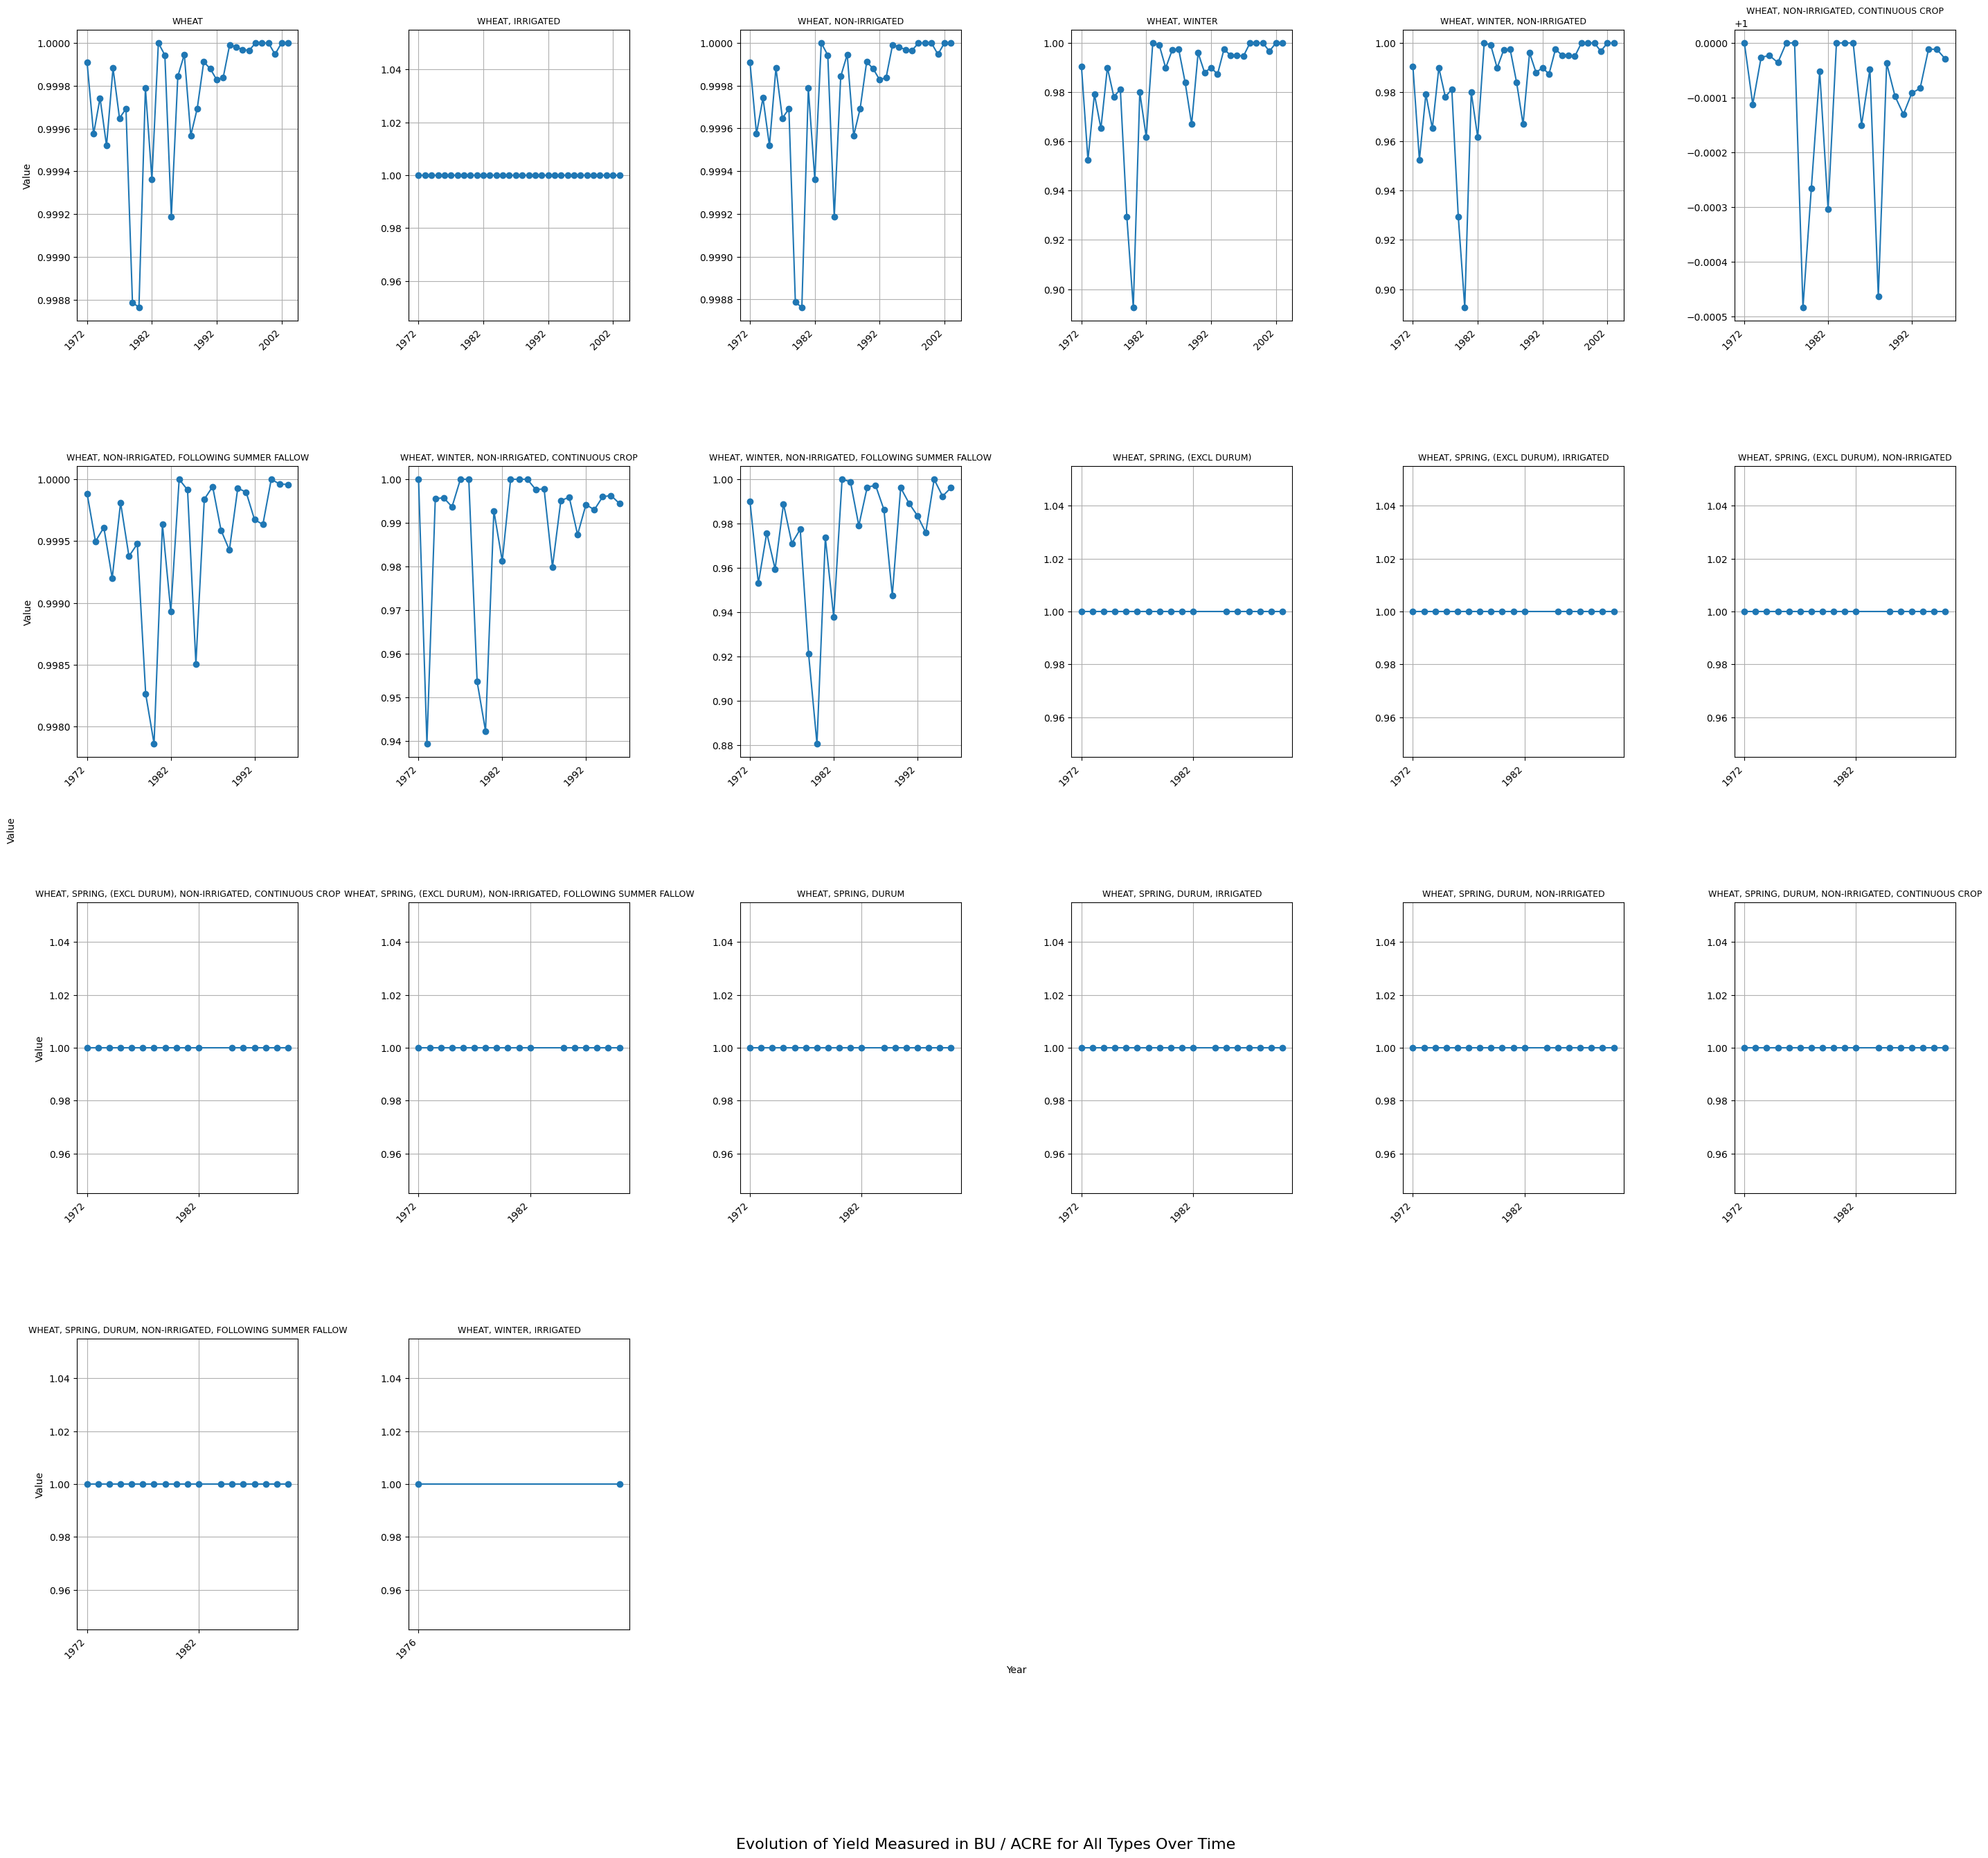

In [ ]:
df_merged = df_merged[~df_merged['Type'].str.contains('HARD')]
unique_types = df_merged['Type'].unique()

# Define the layout of the subplots
nrows = 4  # Adjust as necessary
ncols = 6  # Adjust as necessary
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(35, 30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot each type in a subplot
for i, type in enumerate(unique_types):
    ax = axes[i // ncols, i % ncols]
    filtered_df = df_merged[(df_merged['Type'] == type) & (df_merged['Variable'] == 'ACRES PLANTED')]
    filtered_df = filtered_df.sort_values('Year')
    ax.plot(filtered_df['Year'], filtered_df['ACRES PLANTED RATIO'], marker='o')
    ax.set_title(f'{type}', fontsize=9)
    ax.grid(True)

    # Define xticks such that they are spaced every 10 years
    min_year, max_year = filtered_df['Year'].min(), filtered_df['Year'].max()
    xticks = range(min_year, max_year + 1, 10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=45, ha='right')

    # Set the y-axis labels to be visible for subplots in the first column
    if i % ncols == 0:
        ax.set_ylabel('Value')

# If the number of unique types is not a multiple of nrows*ncols, hide the empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flat[j])

# Add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# Hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# Set common labels
plt.xlabel("Year", labelpad=20)
plt.ylabel("Value", labelpad=40)
fig.suptitle('Evolution of Yield Measured in BU / ACRE for All Types Over Time', fontsize=16, y=0.01)
plt.savefig('Acres Planted ratio.png', bbox_inches='tight', dpi=300)

plt.show()